In [68]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Linear regression

As we discussed in class, there is a closed form solution for the coefficients used in linear regression. If the linear function is give by $Y(x_i,\{a_0,a_1\})=a_0+a_1x$, then the coeeficients are
$$a_0=\frac{\Sigma_y\Sigma_{x^2}-\Sigma_x\Sigma_{xy}}{S\Sigma_{x^2}-(\Sigma_x)^2}, \qquad a_1=\frac{S\Sigma_{xy}-\Sigma_{y}\Sigma_x}{S\Sigma_{x^2}-(\Sigma_x)^2},$$
where,
$$S\equiv \sum_{i=0}^{N-1} \frac{1}{\sigma_i^2}, \quad
\Sigma_x\equiv \sum_{i=0}^{N-1} \frac{x_i}{\sigma_i^2}, \quad
\Sigma_y\equiv \sum_{i=0}^{N-1} \frac{y_i}{\sigma_i^2}, \quad
\Sigma_{x^2}\equiv \sum_{i=0}^{N-1} \frac{x_i^2}{\sigma_i^2}, \quad
\Sigma_{xy}\equiv \sum_{i=0}^{N-1} \frac{x_iy_i}{\sigma_i^2}.$$
In addition, we can calculate the $\chi^2$ as
$$\chi^2(a_0,a_1)=\sum_{i=0}^{N-1}\frac{[a_0+a_1x_i-y_i]^2}{\sigma_i^2},$$
and the variance in the coefficients as:
$$\sigma_{a_0}=\sqrt{\frac{\Sigma_{x^2}}{S\Sigma_{x^2}-(\Sigma_x)^2}}, \qquad \sigma_{a_1}=\sqrt{\frac{S}{S\Sigma_{x^2}-(\Sigma_x)^2}}.$$

Therefore, a program for linear regression simply involves copying these equations into code:

In [69]:
def linear_reg(x,y,sig):
    '''Linear regression'''
    
    S=np.sum(1.0/(sig**2))
    SigX=np.sum(x/(sig**2))
    SigY=np.sum(y/(sig**2))
    SigX2=np.sum(x**2/(sig**2))
    SigXY=np.sum(x*y/(sig**2))

    # Coefficients
    a0=(SigY*SigX2-SigX*SigXY)/(S*SigX2-SigX**2)
    a1=(S*SigXY-SigY*SigX)/(S*SigX2-SigX**2)
    
    # Errors in coefficients
    sigA0=np.sqrt(SigX2/(S*SigX2-SigX**2))
    sigA1=np.sqrt(S/(S*SigX2-SigX**2))
    
    # The fitted linear function
    Yreg=a0+a1*x
    
    # \chi^2
    chi2=np.sum(np.sum((Yreg-y)**2/sig**2))
    
    return Yreg,a0,sigA0,a1,sigA1,chi2

## Example: A linear function with noise

We can test our program on a linear function with some random noise included. Note that the results will be slightly different every time we run because of the random noise.

Y =  1.3899873142021708 (+/-  0.5573044368153888 ) +  0.5174563738917293 (+/- 0.019207841535960987 ) x
chi^2 =  50.90935895124326 , N-M = 48


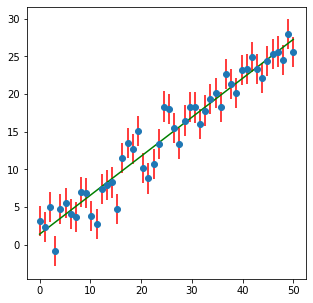

In [86]:
# x points
pts = 50
x=np.linspace(0,50,pts)

# Level of randomness. Note that \sigma is constant for all i
alpha=2.0
sig=np.ones(pts)*alpha

# Linear function
c0 = 2.0
c1 = 0.5
y=c0+c1*x

# Add some noise (randn are random numbers chosen from a Gaussian distribution)
alphaR=alpha*(np.random.randn(pts))
y+=alphaR
    
# Perform the linear regression
Yreg,a0,sigA0,a1,sigA1,chi2=linear_reg(x,y,sig)

# Print out the fitted equation, errors in coefficients, and \chi^2
print('Y = ',a0,'(+/- ',sigA0,') + ',a1,'(+/-',sigA1,') x')    
print('chi^2 = ',chi2, ', N-M = 48')

# Plot:
fig1,ax1=plt.subplots(figsize=(5,5))

ax1.errorbar(x,y,yerr=sig,fmt='o',ecolor='r')
ax1.plot(x,Yreg,'-g')

plt.savefig('lin_reg.pdf',bbox_inches='tight')
plt.show()

## Example: A nonlinear function

Note that in the previous example, $\chi^2\simeq N-M$. This suggests that our function is a good representation of the data. What if we try to fit a line to less appropriate function? Let's try a parabola:

Y =  10.826639774232593 (+/-  0.5573044368153888 ) +  -0.5263396989506838 (+/- 0.019207841535960987 ) x
chi^2 =  205.33357355282305 , N-M = 48


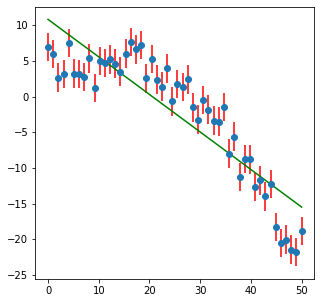

In [87]:
# x points
pts = 50
x=np.linspace(0,50,pts)

# Level of randomness. Note that \sigma is constant for all i
alpha=2.0
sig=np.ones(pts)*alpha

# Quadratic function
c0 = 2.0
c1 = 0.5
c2 = -0.02
y=c0+c1*x+c2*x**2

# Add some noise (randn are random numbers chosen from a Gaussian distribution)
alphaR=alpha*(np.random.randn(pts))
y+=alphaR
    
# Perform the linear regression
Yreg,a0,sigA0,a1,sigA1,chi2=linear_reg(x,y,sig)

# Print out the fitted equation, errors in coefficients, and \chi^2
print('Y = ',a0,'(+/- ',sigA0,') + ',a1,'(+/-',sigA1,') x')    
print('chi^2 = ',chi2, ', N-M = 48')

# Plot:
fig1,ax1=plt.subplots(figsize=(5,5))

ax1.errorbar(x,y,yerr=sig,fmt='o',ecolor='r')
ax1.plot(x,Yreg,'-g')

plt.savefig('lin_reg_quad.pdf',bbox_inches='tight')
plt.show()

Note that $\chi^2 \gg N-M$, indicating that our function is not an appropriate representation of the function.

# General least squares

We now turn to the general procedure to do a least-squares fit. As discussed in class, we define the function to be fit as a linear combination of basis functions $Y$. In the example below, we take this to be polynomials up to some order. To find the coefficients, we need to generate the design matrix
$$\textbf{A}=\begin{bmatrix} 
\frac{Y_0(x_0)}{\sigma_0} & \frac{Y_1(x_0)}{\sigma_0} & \dots \\
\frac{Y_0(x_1)}{\sigma_1} & \frac{Y_1(x_1)}{\sigma_1} & \dots \\
\vdots & \vdots & \ddots \\
\end{bmatrix},$$
and then solve the equation
$(\textbf{A}^{\text{T}}\textbf{A})\textbf{a}=\textbf{A}^{\text{T}}\textbf{b},$
where $b_i=y_i/\sigma_i$.

In [80]:
def polynomial_reg(x,y,polyOrder,sig):
    '''Least squares polynomial fitting'''
    
    # Coefficients is one plus the order of the polynomial 
    nPoly=polyOrder+1
    nPts=len(x)
    A=np.zeros((nPts,nPoly))
 
    # Populate the Design matrix
    for j in range(nPoly):
        A[:,j]=x**j/sig
    
    ATb=np.matmul(A.T,y/sig)
    ATA=np.matmul(A.T,A)
    
    # TEST: Check how ill conditioned A^T A is 
    #print(np.linalg.cond(ATA))
    
    # For now use numpy:
    a=np.linalg.solve(ATA,ATb)
        
    # Construct the polynomial
    Yreg=np.zeros(nPts)
    for j in range(nPoly):
        Yreg+=a[j]*x**j
        
    # \chi^2
    chi2=np.sum(np.sum((Yreg-y)**2/sig**2))
    
    # Error in coefficients
    sigA=np.sqrt(np.diagonal(np.linalg.inv(ATA)))
    
    return Yreg,a,sigA,chi2

def print_poly(a,sigA,prec):
    '''Rough function to print out polynomials'''
    
    nPoly=len(a)
    print('Y = ',end='')
    
    for pol in range(nPoly):
        print(np.round(a[pol],prec),'(+/-',np.round(sigA[pol],prec),')',end='')
        
        if pol > 0:
            if pol == 1:
                print('x',end='')
            else:
                print('x^',pol,end='')
        if pol != nPoly-1:
            print('+',end='')
        else:
            print('\n')
       

## Example: Linear function

Lets test out polynomial regression program on the linear function of the form used previously:

Y = 1.82147 (+/- 0.5573 )+0.49118 (+/- 0.01921 )x

chi^2 =  46.26849494735951 , N-M = 48


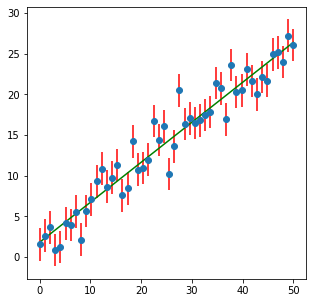

In [81]:
# x points
pts = 50
x=np.linspace(0,50,pts)

# Level of randomness. Note that \sigma is constant for all i
alpha=2.0
sig=np.ones(pts)*alpha

# Linear function
c0 = 2.0
c1 = 0.5
y=c0+c1*x

# Add some noise (randn are random numbers chosen from a Gaussian distribution)
alphaR=alpha*(np.random.randn(pts))
y+=alphaR
    
# Perform the regression
polyOrder=1
Yreg,a,sigA,chi2=polynomial_reg(x,y,polyOrder,sig)

# Print out the fitted equation, errors in coefficients, and \chi^2
print_poly(a,sigA,5)
print('chi^2 = ',chi2, ', N-M = 48')

# Plot:
fig1,ax1=plt.subplots(figsize=(5,5))

ax1.errorbar(x,y,yerr=sig,fmt='o',ecolor='r')
ax1.plot(x,Yreg,'-g')

plt.savefig('lin_reg_poly.pdf',bbox_inches='tight')
plt.show()

We see that it works just as well as our linear regression above. Lets fit the quadratic function:

Y = 1.66731 (+/- 0.81568 )+0.49021 (+/- 0.07545 )x+-0.01964 (+/- 0.00146 )x^ 2

chi^2 =  37.53199379178953 , N-M = 48


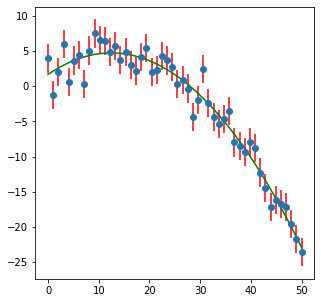

In [82]:
# x points
pts = 50
x=np.linspace(0,50,pts)

# Level of randomness. Note that \sigma is constant for all i
alpha=2.0
sig=np.ones(pts)*alpha

# Quadratic function
c0 = 2.0
c1 = 0.5
c2 = -0.02
y=c0+c1*x+c2*x**2

# Add some noise (randn are random numbers chosen from a Gaussian distribution)
alphaR=alpha*(np.random.randn(pts))
y+=alphaR
    
# Perform the regression
polyOrder=2
Yreg,a,sigA,chi2=polynomial_reg(x,y,polyOrder,sig)

# Print out the fitted equation, errors in coefficients, and \chi^2
print_poly(a,sigA,5)
print('chi^2 = ',chi2, ', N-M = 48')

# Plot:
fig1,ax1=plt.subplots(figsize=(5,5))

ax1.errorbar(x,y,yerr=sig,fmt='o',ecolor='r')
ax1.plot(x,Yreg,'-g')

plt.savefig('lin_reg_quad_poly.pdf',bbox_inches='tight')
plt.show()

The fitting looks good, and the $\chi^2$ looks reasonable. What if we try to fit to a much higher order polynomial? Lets try one of order 8: 

Y = 2.6979896602 (+/- 1.7967449258 )+-1.3037797362 (+/- 1.8106299011 )x+0.5236423179 (+/- 0.5778904998 )x^ 2+-0.0657419357 (+/- 0.0809500879 )x^ 3+0.0040633012 (+/- 0.0059136659 )x^ 4+-0.0001408219 (+/- 0.0002422172 )x^ 5+2.7747e-06 (+/- 5.6012e-06 )x^ 6+-2.91e-08 (+/- 6.83e-08 )x^ 7+1e-10 (+/- 3e-10 )x^ 8

chi^2 =  35.71330100399662 , N-M = 48


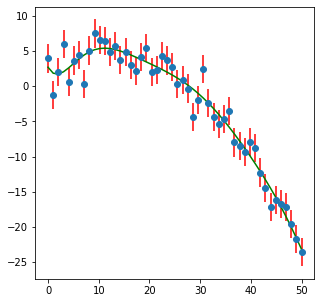

In [83]:
# Perform the regression
polyOrder=8
Yreg,a,sigA,chi2=polynomial_reg(x,y,polyOrder,sig)

# Print out the fitted equation, errors in coefficients, and \chi^2
print_poly(a,sigA,10)
print('chi^2 = ',chi2, ', N-M = 48')

# Plot:
fig1,ax1=plt.subplots(figsize=(5,5))

ax1.errorbar(x,y,yerr=sig,fmt='o',ecolor='r')
ax1.plot(x,Yreg,'-g')

plt.savefig('lin_reg_ten_poly.pdf',bbox_inches='tight')
plt.show()

The fit looks good, but notice that the coefficients have large varience. Many of the higher orders have very small coefficients. We have not significantly imporved the $\chi^2$.